In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import datetime as dt
import matplotlib.pyplot as plt
import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

C:\Anaconda2\lib\site-packages\QSTK\qstkutil\qsdateutil.py:36: FutureWarning: TimeSeries is deprecated. Please use Series
  return pd.TimeSeries(index=dates, data=dates)


In [3]:
%matplotlib inline

In [17]:
ls_symbols=['AAPL','GLD','GOOG','$SPX','XOM']
dt_start=dt.datetime(2012,1,1)
dt_end=dt.datetime(2012,12,31)
dt_timeofday=dt.timedelta(hours=16)
ldt_timestamps=du.getNYSEdays(dt_start,dt_end,dt_timeofday)

In [22]:
c_dataobj=da.DataAccess('Yahoo')
ls_keys=['open','high','low','close','volume','actual_close']
ldf_data=c_dataobj.get_data(ldt_timestamps,ls_symbols,ls_keys)
d_data=dict(zip(ls_keys,ldf_data))

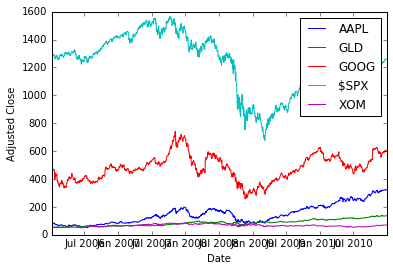

In [7]:
na_price=d_data['close'].values
plt.clf()
plt.plot(ldt_timestamps,na_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')
plt.savefig('adjustedclose.pdf',format='pdf')

In [9]:
na_normalized_price=na_price/na_price[0,:]

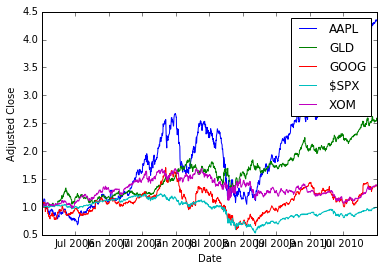

In [10]:
plt.clf()
plt.plot(ldt_timestamps,na_normalized_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')
plt.savefig('Normalized Adjusted Close Price',format='pdf')

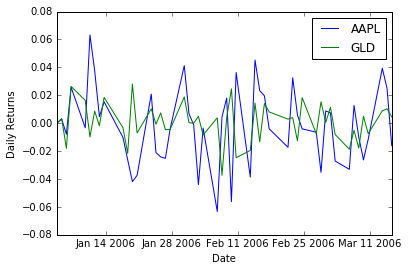

In [11]:
na_rets=na_normalized_price.copy()
daily_rets=tsu.returnize0(na_rets)
plt.plot(ldt_timestamps[0:50],daily_rets[0:50,0])
plt.plot(ldt_timestamps[0:50],daily_rets[0:50,1])
plt.legend(ls_symbols)
plt.ylabel('Daily Returns')
plt.xlabel('Date')

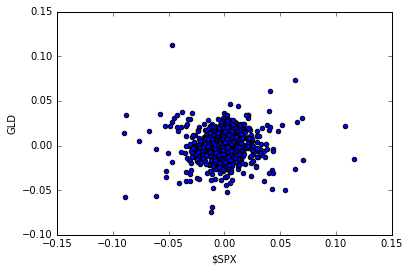

In [13]:
plt.scatter(na_rets[:,3],na_rets[:,1],c='blue')
plt.ylabel('GLD')
plt.xlabel('$SPX')